In [35]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [4]:
#ahora llamamos el archivo con el que se va a trabajar
df=pd.read_csv("Customers.csv")

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# Estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Estadísticas descriptivas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# Ver distribución por género
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

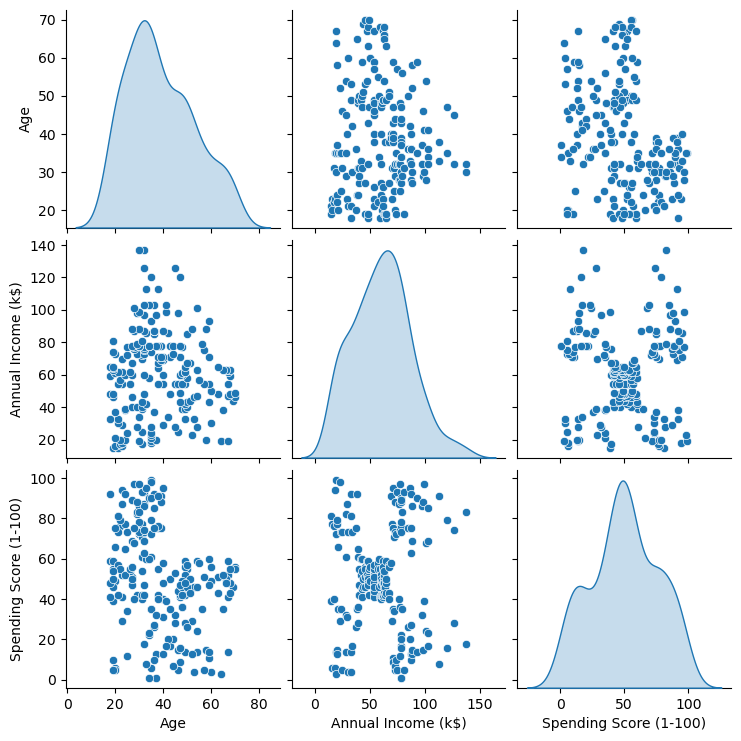

In [12]:
# Distribución de ingreso anual y puntaje de gasto
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')


<Axes: >

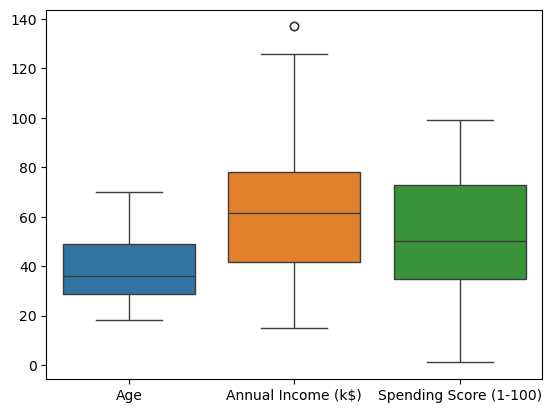

In [13]:
# Boxplot para detectar outliers
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [14]:
# Convertir género a valores numéricos si se usará
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [15]:
# Verificar valores nulos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# Eliminar columnas no necesarias
df_model = df.drop(['CustomerID'], axis=1)

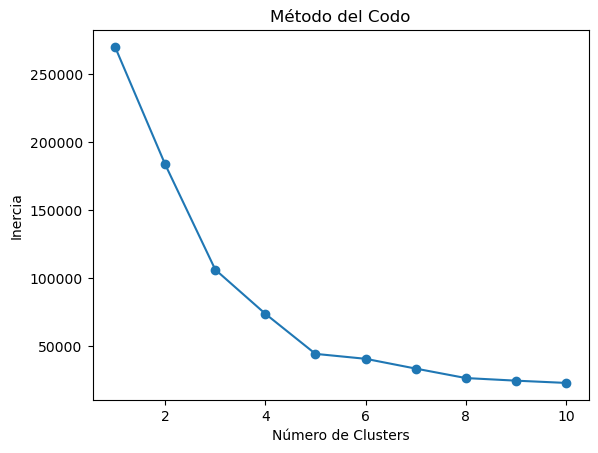

In [31]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()

In [36]:
# Evaluación K-means
print("K-means:")
print("Silhouette:", silhouette_score(X, df['KMeans_Cluster']))
print("Calinski-Harabasz:", calinski_harabasz_score(X, df['KMeans_Cluster']))
print("Davies-Bouldin:", davies_bouldin_score(X, df['KMeans_Cluster']))

K-means:
Silhouette: 0.553931997444648
Calinski-Harabasz: 247.35899338037288
Davies-Bouldin: 0.5725628995597086


In [38]:
agg = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = agg.fit_predict(X)

In [39]:
print("\nJerárquico:")
print("Silhouette:", silhouette_score(X, df['Hierarchical_Cluster']))
print("Calinski-Harabasz:", calinski_harabasz_score(X, df['Hierarchical_Cluster']))
print("Davies-Bouldin:", davies_bouldin_score(X, df['Hierarchical_Cluster']))


Jerárquico:
Silhouette: 0.4618340266628975
Calinski-Harabasz: 143.81953140807286
Davies-Bouldin: 0.7068435076376502


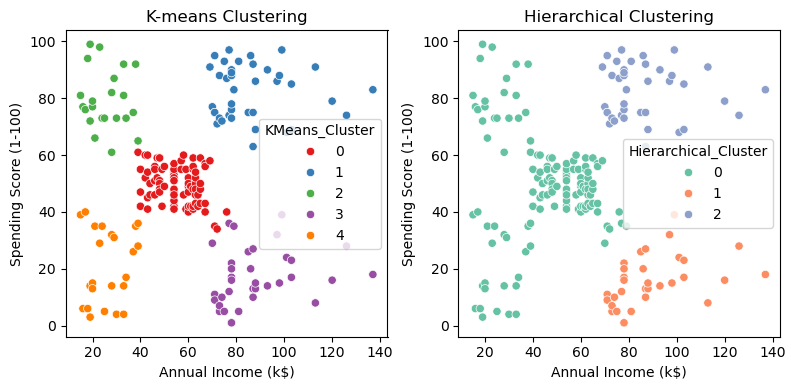

In [40]:
# Visualización de clusters
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='Set1')
plt.title("K-means Clustering")

plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=df, palette='Set2')
plt.title("Hierarchical Clustering")

plt.tight_layout()
plt.show()
